## Undirected Graphical Model (UGM)

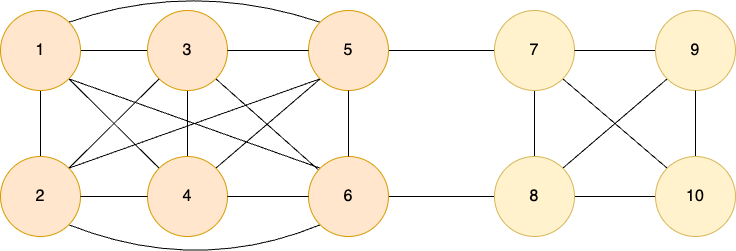


Consider a graph with 10 nodes of real random variables (i.e., $x_1, x_2,...,x_{10}$), where the maximal cliques are given as: $C_1=\{x_1, x_2, x_3, x_4, x_5, x_6\}$, $C_2: =\{x_7,x_8,x_9,x_{10}\}$, $C_3={x_5, x_7}$, $C_4 = \{x_6, x_8\}$ (See figure above).

That is, $(x_1, x_2,...,x_6)$ are fully-connected and the potential functions are given as follows:
$$\phi_{C_1}(x_1, x_2,...,x_6) = \exp(-[x_1, x_2,...,x_6] \Sigma^{-1}[x_1, x_2,...,x_6]^T)$$
where
$$\Sigma =
\begin{bmatrix} 
2 & 0.5 & 0.2 & 0.5 & 0.5 & 0.2\\
0.5 & 2 & 0.8 & 0.8 & 0.5 & 0.5\\
0.2 & 0.8 & 1 & 0.2 & 0.1 & 0.1\\
0.5 & 0.8 & 0.2 & 1 & 0.5 & 0.5\\
0.5 & 0.5 & 0.1 & 0.5 & 2 & 0.8\\
0.2 & 0.5 & 0.1 & 0.5 & 0.8 & 2
\end{bmatrix}
$$
Similarly, $(x_7, x_8, x_9, x_{10})$ are fully-connected and the potential functions are given as follows:
$$\phi_{C_2}(x_7, x_8, x_9, x_{10}) = \exp(\Sigma_{i=7}^{10} x_i^4 - \Sigma_{7 \leq i<j \leq 10} x_i^2 x_j^2)$$

Additionally, node 5 and 7 are connected and $\phi_{C_3}(x_5,x_7) = \exp(-x_5^4 x_7^6)$.
And node 6 and node 8 are connected and $\phi_{C_4}(x_6,x_8) = \exp(-x_6^2 x_8^8)$.

(i) Sample 100,000 data points from the pdf of the graphical model $p(x) \propto \prod \phi(x_i)$, where $x$ is real.

(ii) Assume only the samples are given and the potential functions are not known, train neural networks using the above generated data and estimate the energy and the potential function for each maximal clique.


In [8]:
import numpy as np
Sigma_1 = np.array([
    [2, 0.5, 0.2, 0.5, 0.5, 0.2],
    [0.5, 2, 0.8, 0.8, 0.5, 0.5],
    [0.2, 0.8, 1, 0.2, 0.1, 0.1],
    [0.5, 0.8, 0.2, 1, 0.5, 0.5],
    [0.5, 0.5, 0.1, 0.5, 2, 0.8],
    [0.2, 0.5, 0.1, 0.5, 0.8, 2]
])

In [10]:
# Define the given potential functions
def phi_C1(x):
    Sigma_inv = np.linalg.inv(Sigma_1)
    return np.exp(-np.dot(x, np.dot(Sigma_inv, x)))

def phi_C2(x):
    return np.exp(np.sum(x**4) - np.sum(np.outer(x**2, x**2)))

def phi_C3(x):
    return np.exp(-x[0]**4 * x[1]**6)

def phi_C4(x):
    return np.exp(-x[0]**2 * x[1]**8)

# Initialize variables
num_samples = 100000
samples = np.zeros((num_samples, 10))
current_sample = np.random.randn(10)  # Random initialization

for i in range(num_samples):
    # Update each node
    for j in range(10):
        # Sample j-th variable conditioned on the values of its neighbors
        if j < 6:
            # Sample from the conditional distribution of the j-th variable in C1
            neighbors = np.delete(current_sample[:6], j)  # Values of neighbors excluding j-th variable
            conditional_distribution = lambda x_j: phi_C1(np.insert(neighbors, j, x_j))
        elif j < 7:
            conditional_distribution = phi_C2  # No neighbors for C2, directly use its potential function
        elif j == 7:
            conditional_distribution = lambda x_j: phi_C3(np.array([current_sample[4], x_j]))
        elif j == 8:
            conditional_distribution = lambda x_j: phi_C4(np.array([current_sample[5], x_j]))
        else:
            conditional_distribution = phi_C2  # No neighbors for C2, directly use its potential function

        # Sample from the conditional distribution
        proposed_value = np.random.randn()  # Sample a proposed value
        acceptance_prob = min(1, conditional_distribution(proposed_value) / conditional_distribution(current_sample[j]))
        if np.random.rand() < acceptance_prob:
            current_sample[j] = proposed_value

    samples[i] = current_sample.copy()

samples


C:\Users\zachb\AppData\Local\Temp\ipykernel_14840\20290605.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_prob = min(1, conditional_distribution(proposed_value) / conditional_distribution(current_sample[j]))
C:\Users\zachb\AppData\Local\Temp\ipykernel_14840\20290605.py:39: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_prob = min(1, conditional_distribution(proposed_value) / conditional_distribution(current_sample[j]))
C:\Users\zachb\AppData\Local\Temp\ipykernel_14840\20290605.py:39: RuntimeWarning: overflow encountered in scalar divide
  acceptance_prob = min(1, conditional_distribution(proposed_value) / conditional_distribution(current_sample[j]))


array([[-2.40831934, -0.30385544, -1.14467173, ..., -0.07235921,
        -0.11123632, -1.47413468],
       [ 0.21350233, -0.71989588, -0.63441951, ..., -0.71125024,
         0.20876181,  0.47885553],
       [-0.27817787, -0.71989588, -0.43790395, ...,  0.02976475,
         0.20876181, -1.30182146],
       ...,
       [ 1.16377391,  0.37000147, -1.37029101, ...,  0.91315591,
         0.2587939 , -0.00326828],
       [-1.62758962,  0.37000147,  0.56994409, ...,  0.54614932,
         0.2587939 ,  1.02239984],
       [-0.97942554, -0.52385623,  0.56994409, ...,  0.22756863,
        -0.04993158, -2.38936385]])

In [14]:
"""Training"""
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Define the neural network architecture
class PotentialEstimator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PotentialEstimator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to calculate energy for a clique
def calculate_energy(samples, clique_idx, potential_estimator):
    clique_samples = torch.tensor(samples[:, clique_idx], dtype=torch.float32)
    energy = -potential_estimator(clique_samples).mean().item()
    return energy

# Function to train potential estimator for a clique
def train_potential_estimator(samples, clique_idx, input_size, hidden_size, output_size, num_epochs=100, lr=0.001):
    clique_samples = samples[:, clique_idx]
    dataset = TensorDataset(torch.tensor(clique_samples, dtype=torch.float32))
    dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

    model = PotentialEstimator(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        for batch in dataloader:
            inputs = batch[0]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, torch.zeros_like(outputs))
            loss.backward()
            optimizer.step()

    return model


# Define clique indices
clique_indices = [[0, 1, 2, 3, 4, 5], [6, 7, 8, 9], [4, 6], [5, 7]]

# Train potential estimators for each clique
potential_estimators = []
for idx in clique_indices:
    input_size = len(idx)
    hidden_size = 64
    output_size = 1
    potential_estimator = train_potential_estimator(samples, idx, input_size, hidden_size, output_size)
    potential_estimators.append(potential_estimator)

# Calculate energy and potential for each clique
energies = []
for idx, clique_idx in enumerate(clique_indices):
    energy = calculate_energy(samples, clique_idx, potential_estimators[idx])
    energies.append(energy)
    print(f"Energy for clique {idx+1}: {energy}")

# Note: Calculating the potential function itself from the neural network may not be straightforward 
# due to the non-linearities introduced by activation functions. However, the energy can be calculated 
# using the neural network output as shown above.


Energy for clique 1: -4.525740223471075e-05
Energy for clique 2: 3.6402880141395144e-06
Energy for clique 3: 9.104996934183873e-08
Energy for clique 4: -8.595592225901783e-05


In [16]:
def estimate_potential_function(samples, clique_idx, potential_estimator):
    # Energy = -log(Potential)
    # Potential = exp(-Energy)
    clique_samples = torch.tensor(samples[:, clique_idx], dtype=torch.float32)
    energy = -potential_estimator(clique_samples)
    potential = torch.exp(energy)
    return potential.detach().numpy()

potential_functions = []
for idx, clique_idx in enumerate(clique_indices):
    potential_function = estimate_potential_function(samples, clique_idx, potential_estimators[idx])
    potential_functions.append(potential_function)
    print(f"Potential function for clique {idx+1}: {potential_function}")

Potential function for clique 1: [[0.99971586]
 [0.99981296]
 [0.99976766]
 ...
 [0.99993306]
 [0.999718  ]
 [0.9997493 ]]
Potential function for clique 2: [[0.99989945]
 [1.0001305 ]
 [0.99986005]
 ...
 [0.99987864]
 [0.9997334 ]
 [0.99993575]]
Potential function for clique 3: [[0.9999799 ]
 [1.0000246 ]
 [0.99997234]
 ...
 [0.99997157]
 [1.000076  ]
 [1.0000323 ]]
Potential function for clique 4: [[0.99991876]
 [0.9998416 ]
 [0.99989736]
 ...
 [0.99994916]
 [0.9999367 ]
 [0.99993265]]
